In [1]:
# Importing required libraries

# Basic libraries
import numpy as np
import pandas as pd
import glob

# Data processing
from transformers import pipeline
from bertopic import BERTopic
import torch
import re
import datetime as dt

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

In [2]:
# Combining files

# Using blob to compile all TikTok files
file_pattern = "TikTok*.csv"
csv_files = glob.glob(file_pattern)

# Checking available files
if not csv_files:
    print(f"No file found in the {file_pattern}")
else:
    print(f"Found {len(csv_files)} file to combine")

# Combining
df_list = []

# Reading all available files
for file in csv_files:
    print(f"Reading {file}...")
    df = pd.read_csv(file)
    df_list.append(df)

    # Combining all files into a single dataframe
    print("\nCombining all available files...")
    combined_df = pd.concat(df_list, ignore_index=True)

    # Saving combined dataframe as CSV
    filename = "combined_tiktok_comments.csv"
    combined_df.to_csv(filename, index=False, encoding="utf-8-sig")

    print(f"Successfully combined all dataframe and saved to {filename}")
    print(f"Total number of combined comments: {len(combined_df)}")

Found 4 file to combine
Reading TikTok Bintang Emon (Kabupaten Bogor).csv...

Combining all available files...
Successfully combined all dataframe and saved to combined_tiktok_comments.csv
Total number of combined comments: 324
Reading TikTok Ferry Irwandy.csv...

Combining all available files...
Successfully combined all dataframe and saved to combined_tiktok_comments.csv
Total number of combined comments: 2824
Reading TikTok Millenial Kece.csv...

Combining all available files...
Successfully combined all dataframe and saved to combined_tiktok_comments.csv
Total number of combined comments: 7016
Reading TikTok KPI.csv...

Combining all available files...
Successfully combined all dataframe and saved to combined_tiktok_comments.csv
Total number of combined comments: 7123


In [3]:
# Read and import combined files

df_tiktok = pd.read_csv("combined_tiktok_comments.csv")
df_tiktok.head(10)

,id,text,createdAt,likeCount,replyCount,commentLanguage,awemeId,isAuthorLiked,user.id,user.username,user.displayName,user.url,user.bio,user.avatarUrl,user.region,user.language,user.hasEmail,user.hasPhone
0,7375072535169630982,2030 Indonesia bubar🗿,2024-05-31T08:08:18.000Z,1921,36,id,7374804241082289413,False,7110210503167886362,_frostth,Frost,https://www.tiktok.com/@_frostth,NaN,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,ID,id,False,False
1,7375074082193179398,takutnya kritikan sebagus ini gk nyampe ke tel...,2024-05-31T08:14:21.000Z,2944,15,id,7374804241082289413,False,6898625738083369985,wtfai09,•,https://www.tiktok.com/@wtfai09,NaN,https://p77-sign-va.tiktokcdn.com/tos-maliva-a...,ID,id,False,False
2,7544345032239006484,"Giliran sinetron yg isinya pacaran, balapan, g...",2025-08-30T11:51:59.000Z,0,0,id,7374804241082289413,False,6923912763560903685,fito4470,Ei'gorian Àgare§,https://www.tiktok.com/@fito4470,AGRES ajah\nNgarepin apa.\nGak ada apa apa.,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,ID,id,False,False
3,7375976798175920901,2045 emas ?🗿😂,2024-06-02T18:37:19.000Z,0,2,ms,7374804241082289413,False,7120622437113414682,therealrizkii,therealrizkii,https://www.tiktok.com/@therealrizkii,Sukabumi\nCopperation?DM \n164/55\n\nClick Lin...,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,ID,id,False,False
4,7375907640616272646,FAKTAAAAAAAAA,2024-06-02T14:29:36.000Z,1,0,id,7374804241082289413,False,6883347115394155522,haiiiaku3141,crocsh,https://www.tiktok.com/@haiiiaku3141,NaN,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,ID,id,False,False
5,7375368758124512005,lama2 kaya korut kita 🗿,2024-06-01T03:17:47.000Z,700,5,id,7374804241082289413,False,6754896032771392514,pengamatfyporang,mr.secret,https://www.tiktok.com/@pengamatfyporang,Jogja,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,ID,id,False,False
6,7385822855843300101,ni negara lama lama jadi Korut dah,2024-06-29T07:25:01.000Z,1,0,ms,7374804241082289413,False,7349952547660907526,feconic0,Feconic,https://www.tiktok.com/@feconic0,NaN,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,ID,en,False,False
7,7390258408970748677,share dan tag sebanyak - banyak nya. biar samp...,2024-07-11T06:17:20.000Z,1,0,id,7374804241082289413,False,7179852032215680001,hlllczr_,🧸MEI,https://www.tiktok.com/@hlllczr_,NaN,https://p77-sign-va.tiktokcdn.com/tos-maliva-a...,ID,id,False,False
8,7381401773289243397,kelas bang,2024-06-17T10:52:48.000Z,0,0,id,7374804241082289413,False,7306808102665585670,ynprss,qwerty,https://www.tiktok.com/@ynprss,NaN,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,ID,id,False,False
9,7382040027854897925,lama lama jadi Korut anjir,2024-06-19T02:45:43.000Z,0,0,id,7374804241082289413,False,7039967927404119067,_satriazz,zzy,https://www.tiktok.com/@_satriazz,lucu bet,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,ID,id,False,False


In [4]:
# Subsetting comments/text and preprocessing

df_sentiment = df_tiktok[['text']]
print(f"Number of comments to be processed: {len(df_sentiment)}")

def text_cleaning(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'&amp;', ' dan ', text)
    text = re.sub(r'[\n\xa0]+', ' ', text)
    if "KaitoEasyAPI" in text:
        return "" # Kembalikan string kosong agar bisa dihapus nanti
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_sentiment['cleaned_text'] = df_sentiment['text'].astype(str).apply(text_cleaning)
df_sentiment.drop(df_sentiment[df_sentiment['cleaned_text'] == ''].index, inplace=True)
texts = df_sentiment['cleaned_text'].tolist()
print(f"Number of comments after preprocessed {len(texts)}")

Number of comments to be processed: 7123
Number of comments after preprocessed 7063


In [5]:
# Sentiment analysis

# Setting-up sentiment analyzer
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis",
    return_all_scores = True,
    truncation = True,
    max_length = 512
)

# Model fitting
sentiment_results = sentiment_analyzer(texts)

Device set to use mps:0


In [6]:
# Getting setiment labels

df_sentiment["sentiment"] = sentiment_results

def get_top_sentiment(score_list):
    return max(score_list, key = lambda x: x["score"])["label"]

df_sentiment["sentiment_label"] = df_sentiment["sentiment"].apply(get_top_sentiment)
df_sentiment["sentiment_label"].value_counts()

sentiment_label
Negative    3499
Neutral     3024
Positive     540
Name: count, dtype: int64

In [10]:
# Adjust sentiment

def get_adjusted_sentiment(scores):
    scores_map = {item['label']: item['score'] for item in scores}
    original_label = max(scores_map, key=scores_map.get)
    if original_label == 'Neutral':
        if scores_map['Negative'] > scores_map['Positive'] * 1:
            return 'Negative' 
    return original_label

df_sentiment['sentiment_adjusted'] = [get_adjusted_sentiment(result) for result in sentiment_results]

# Adjusted sentiment count

df_sentiment["sentiment_adjusted"].value_counts()

sentiment_adjusted
Negative    5821
Neutral      702
Positive     540
Name: count, dtype: int64

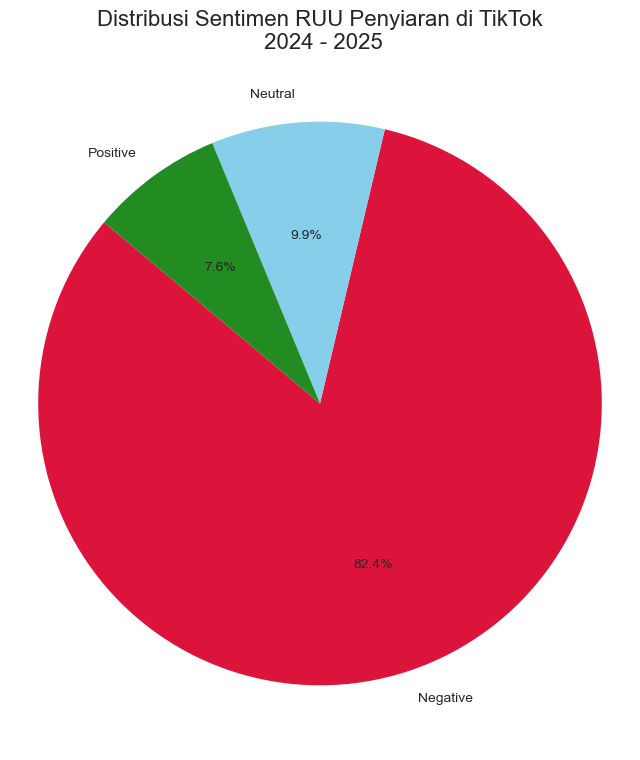

In [11]:
# Visualizing sentiment analysis

sentiment_counts = df_sentiment['sentiment_adjusted'].value_counts()
color_map = {
    'Positive': 'forestgreen',  # Hijau
    'Neutral':  'skyblue',      # Biru
    'Negative': 'crimson'       # Merah
}
ordered_colors = [color_map.get(label, '#CCCCCC') for label in sentiment_counts.index]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 9))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=ordered_colors  # Menggunakan daftar warna kustom
)

plt.title('Distribusi Sentimen RUU Penyiaran di TikTok\n 2024 - 2025', fontsize=16)
plt.axis('equal')
plt.show()

In [12]:
# Checking sentiment distribution

df_sentiment.head(30)

,text,cleaned_text,sentiment,sentiment_label,sentiment_adjusted
0,2030 Indonesia bubar🗿,2030 Indonesia bubar🗿,"[{'label': 'Negative', 'score': 0.056181143969...",Neutral,Neutral
1,takutnya kritikan sebagus ini gk nyampe ke tel...,takutnya kritikan sebagus ini gk nyampe ke tel...,"[{'label': 'Negative', 'score': 0.997483313083...",Negative,Negative
2,"Giliran sinetron yg isinya pacaran, balapan, g...","Giliran sinetron yg isinya pacaran, balapan, g...","[{'label': 'Negative', 'score': 0.994739949703...",Negative,Negative
3,2045 emas ?🗿😂,2045 emas ?🗿😂,"[{'label': 'Negative', 'score': 0.465412825345...",Neutral,Negative
4,FAKTAAAAAAAAA,FAKTAAAAAAAAA,"[{'label': 'Negative', 'score': 0.956403434276...",Negative,Negative
5,lama2 kaya korut kita 🗿,lama2 kaya korut kita 🗿,"[{'label': 'Negative', 'score': 0.986828446388...",Negative,Negative
6,ni negara lama lama jadi Korut dah,ni negara lama lama jadi Korut dah,"[{'label': 'Negative', 'score': 0.984975039958...",Negative,Negative
7,share dan tag sebanyak - banyak nya. biar samp...,share dan tag sebanyak - banyak nya. biar samp...,"[{'label': 'Negative', 'score': 0.770856738090...",Negative,Negative
8,kelas bang,kelas bang,"[{'label': 'Negative', 'score': 0.014786568470...",Neutral,Negative
9,lama lama jadi Korut anjir,lama lama jadi Korut anjir,"[{'label': 'Negative', 'score': 0.993756651878...",Negative,Negative


In [13]:
# Visualizing sentiment distribution overtime

# Appending timeline
df_sentiment['timeline'] = df_tiktok['createdAt']
df_sentiment['timeline'] = pd.to_datetime(df_sentiment['timeline'])
print(df_sentiment.head(5))
print(df_sentiment.info())

                                                text  \
0                              2030 Indonesia bubar🗿   
1  takutnya kritikan sebagus ini gk nyampe ke tel...   
2  Giliran sinetron yg isinya pacaran, balapan, g...   
3                                      2045 emas ?🗿😂   
4                                      FAKTAAAAAAAAA   

                                        cleaned_text  \
0                              2030 Indonesia bubar🗿   
1  takutnya kritikan sebagus ini gk nyampe ke tel...   
2  Giliran sinetron yg isinya pacaran, balapan, g...   
3                                      2045 emas ?🗿😂   
4                                      FAKTAAAAAAAAA   

                                           sentiment sentiment_label  \
0  [{'label': 'Negative', 'score': 0.056181143969...         Neutral   
1  [{'label': 'Negative', 'score': 0.997483313083...        Negative   
2  [{'label': 'Negative', 'score': 0.994739949703...        Negative   
3  [{'label': 'Negative', 'score': 0.4

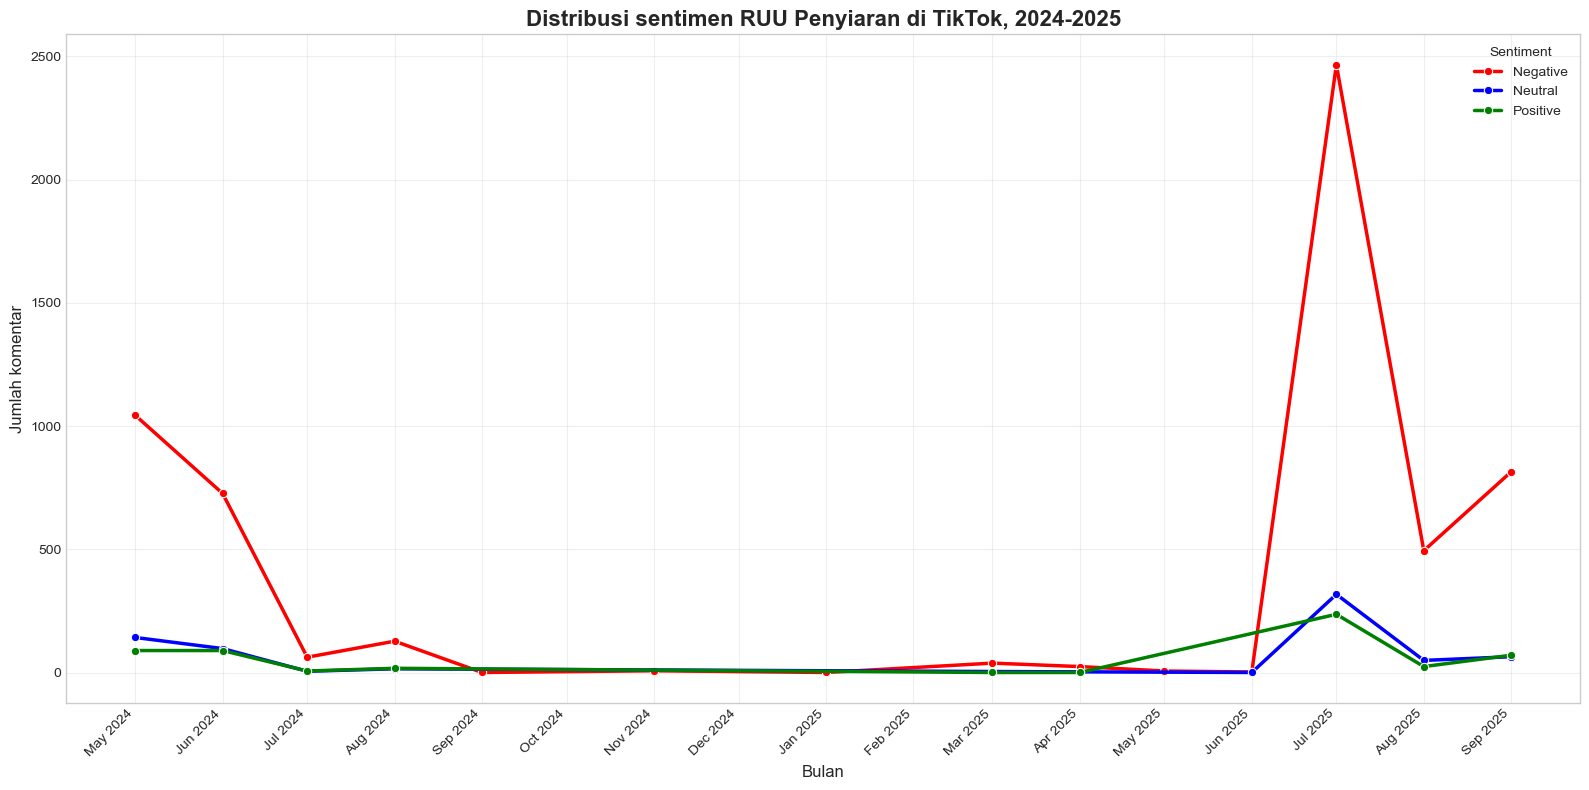

In [15]:
# Time-series sentiment visualization 

# Prepare data for seaborn
df_time = df_sentiment.copy()
df_time.dropna(subset=['timeline'], inplace=True)
df_time['timeline'] = pd.to_datetime(df_time['timeline'])

# Create monthly bins by converting to period and then to timestamp for plotting
df_time['month'] = df_time['timeline'].dt.to_period('M')
monthly_sentiment_long = df_time.groupby(['month', 'sentiment_adjusted']).size().reset_index(name='count')

# Convert period to timestamp for proper plotting
monthly_sentiment_long['month'] = monthly_sentiment_long['month'].dt.to_timestamp()

# Setting up visualization style
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))

# Define custom color palette
sentiment_palette = {
    'Negative': 'red',
    'Positive': 'green', 
    'Neutral': 'blue'
}

# Plotting with seaborn
sns.lineplot(
    data=monthly_sentiment_long,
    x='month',
    y='count',
    hue='sentiment_adjusted',
    ax=ax,
    linewidth=2.5,
    marker='o',
    markersize=6,
    palette=sentiment_palette
)

# Customize the plot
ax.set_title('Distribusi sentimen RUU Penyiaran di TikTok, 2024-2025', fontsize=16, fontweight='bold')
ax.set_xlabel('Bulan', fontsize=12)
ax.set_ylabel('Jumlah komentar', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(title='Sentiment', title_fontsize=10)

# Format x-axis to show months clearly
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Apa yang terjadi di Bulan Mei 2024 dan Juni-Agustus 2025?**

In [20]:
# May to July 2024 subsetting

start2024 = '2024-05-01'
end2024 = '2024-07-31'

df_mayjuly = df_time[(df_time['timeline'] >= start2024) & (df_time['timeline'] <= end2024)]
df_mayjuly.head(30)

,text,cleaned_text,sentiment,sentiment_label,sentiment_adjusted,timeline,month
0,2030 Indonesia bubar🗿,2030 Indonesia bubar🗿,"[{'label': 'Negative', 'score': 0.056181143969...",Neutral,Neutral,2024-05-31 08:08:18+00:00,2024-05
1,takutnya kritikan sebagus ini gk nyampe ke tel...,takutnya kritikan sebagus ini gk nyampe ke tel...,"[{'label': 'Negative', 'score': 0.997483313083...",Negative,Negative,2024-05-31 08:14:21+00:00,2024-05
3,2045 emas ?🗿😂,2045 emas ?🗿😂,"[{'label': 'Negative', 'score': 0.465412825345...",Neutral,Negative,2024-06-02 18:37:19+00:00,2024-06
4,FAKTAAAAAAAAA,FAKTAAAAAAAAA,"[{'label': 'Negative', 'score': 0.956403434276...",Negative,Negative,2024-06-02 14:29:36+00:00,2024-06
5,lama2 kaya korut kita 🗿,lama2 kaya korut kita 🗿,"[{'label': 'Negative', 'score': 0.986828446388...",Negative,Negative,2024-06-01 03:17:47+00:00,2024-06
6,ni negara lama lama jadi Korut dah,ni negara lama lama jadi Korut dah,"[{'label': 'Negative', 'score': 0.984975039958...",Negative,Negative,2024-06-29 07:25:01+00:00,2024-06
7,share dan tag sebanyak - banyak nya. biar samp...,share dan tag sebanyak - banyak nya. biar samp...,"[{'label': 'Negative', 'score': 0.770856738090...",Negative,Negative,2024-07-11 06:17:20+00:00,2024-07
8,kelas bang,kelas bang,"[{'label': 'Negative', 'score': 0.014786568470...",Neutral,Negative,2024-06-17 10:52:48+00:00,2024-06
9,lama lama jadi Korut anjir,lama lama jadi Korut anjir,"[{'label': 'Negative', 'score': 0.993756651878...",Negative,Negative,2024-06-19 02:45:43+00:00,2024-06
10,setuju bgtttt,setuju bgtttt,"[{'label': 'Negative', 'score': 0.021800037473...",Positive,Positive,2024-07-16 05:38:42+00:00,2024-07


In [23]:
df_mayjuly.tail(30)

,text,cleaned_text,sentiment,sentiment_label,sentiment_adjusted,timeline,month
7093,nonton serba vpn,nonton serba vpn,"[{'label': 'Negative', 'score': 0.755122423171...",Negative,Negative,2024-06-02 04:50:42+00:00,2024-06
7094,banyak aturan. saya setuju emang engga asik se...,banyak aturan. saya setuju emang engga asik se...,"[{'label': 'Negative', 'score': 0.381201952695...",Neutral,Negative,2024-06-01 14:19:40+00:00,2024-06
7095,Kami Pasukan 58% Tetap Dukung Pemerintah Dan P...,Kami Pasukan 58% Tetap Dukung Pemerintah Dan P...,"[{'label': 'Negative', 'score': 0.002240764908...",Positive,Positive,2024-06-01 07:32:26+00:00,2024-06
7096,kpi isinya ortu doang yg nyari untung,kpi isinya ortu doang yg nyari untung,"[{'label': 'Negative', 'score': 0.996310174465...",Negative,Negative,2024-05-31 18:03:31+00:00,2024-05
7097,menghindari anda KPI😆😆,menghindari anda KPI😆😆,"[{'label': 'Negative', 'score': 0.968457341194...",Negative,Negative,2024-05-31 16:12:00+00:00,2024-05
7098,yg harus di didik itu kpi\nsifat korup ada saj...,yg harus di didik itu kpi sifat korup ada saja...,"[{'label': 'Negative', 'score': 0.971779346466...",Negative,Negative,2024-05-31 10:30:01+00:00,2024-05
7099,"yg mereka pikirin cuma duit mereka sendiri, sm...","yg mereka pikirin cuma duit mereka sendiri, sm...","[{'label': 'Negative', 'score': 0.978742241859...",Negative,Negative,2024-05-31 02:13:20+00:00,2024-05
7100,Gua udah 7tahun kg nnton tv gegara kaga asik l...,Gua udah 7tahun kg nnton tv gegara kaga asik l...,"[{'label': 'Negative', 'score': 0.975265443325...",Negative,Negative,2024-05-30 14:31:08+00:00,2024-05
7101,"lawak bgt si coki dama s\ndedy, kemarin diam ""...","lawak bgt si coki dama s dedy, kemarin diam ""a...","[{'label': 'Negative', 'score': 0.985166966915...",Negative,Negative,2024-05-30 14:22:20+00:00,2024-05
7102,aturan ini tu tp iklan slot dmn² waras gak sih...,aturan ini tu tp iklan slot dmn² waras gak sih...,"[{'label': 'Negative', 'score': 0.980859875679...",Negative,Negative,2024-05-30 13:43:25+00:00,2024-05


In [25]:
# June to August 2025 subsetting

start2025 = '2025-06-01'
end2025 = '2025-08-31'

df_juneaug = df_time[(df_time['timeline'] >= start2025) & (df_time['timeline'] <= end2025)]
df_juneaug.head(30)

,text,cleaned_text,sentiment,sentiment_label,sentiment_adjusted,timeline,month
2,"Giliran sinetron yg isinya pacaran, balapan, g...","Giliran sinetron yg isinya pacaran, balapan, g...","[{'label': 'Negative', 'score': 0.994739949703...",Negative,Negative,2025-08-30 11:51:59+00:00,2025-08
42,betul juga bang 😂😂,betul juga bang 😂😂,"[{'label': 'Negative', 'score': 0.003246034495...",Neutral,Neutral,2025-06-25 13:02:18+00:00,2025-06
221,bubarkan dpr,bubarkan dpr,"[{'label': 'Negative', 'score': 0.781896829605...",Negative,Negative,2025-08-06 11:40:23+00:00,2025-08
222,kaki tangan marcello ternyata ini anak,kaki tangan marcello ternyata ini anak,"[{'label': 'Negative', 'score': 0.532151997089...",Negative,Negative,2025-06-22 02:42:38+00:00,2025-06
270,"kasihan konten""live yg jualan hadehhh tik tok ...","kasihan konten""live yg jualan hadehhh tik tok ...","[{'label': 'Negative', 'score': 0.995105147361...",Negative,Negative,2025-08-30 17:18:39+00:00,2025-08
336,gua menolak ruu penyiaran,gua menolak ruu penyiaran,"[{'label': 'Negative', 'score': 0.367552280426...",Neutral,Negative,2025-08-29 00:38:44+00:00,2025-08
536,sorry,sorry,"[{'label': 'Negative', 'score': 0.471128195524...",Neutral,Negative,2025-08-27 13:52:44+00:00,2025-08
537,mantap,mantap,"[{'label': 'Negative', 'score': 0.002196080749...",Positive,Positive,2025-08-08 03:06:25+00:00,2025-08
726,😂,😂,"[{'label': 'Negative', 'score': 0.059715684503...",Neutral,Negative,2025-08-30 23:53:14+00:00,2025-08
727,😁,😁,"[{'label': 'Negative', 'score': 0.059715684503...",Neutral,Negative,2025-08-30 23:29:55+00:00,2025-08


In [24]:
df_juneaug.tail(30)

,text,cleaned_text,sentiment,sentiment_label,sentiment_adjusted,timeline,month
6992,pertama,pertama,"[{'label': 'Negative', 'score': 0.114732258021...",Neutral,Negative,2025-07-26 17:00:33+00:00,2025-07
6993,pertama,pertama,"[{'label': 'Negative', 'score': 0.114732258021...",Neutral,Negative,2025-07-26 17:02:37+00:00,2025-07
6994,pemerintah masih pemikiran kuno y gini,pemerintah masih pemikiran kuno y gini,"[{'label': 'Negative', 'score': 0.984344780445...",Negative,Negative,2025-07-26 17:00:22+00:00,2025-07
6995,😬,😬,"[{'label': 'Negative', 'score': 0.059715684503...",Neutral,Negative,2025-07-26 17:00:15+00:00,2025-07
6996,masih anget,masih anget,"[{'label': 'Negative', 'score': 0.001966199139...",Neutral,Negative,2025-07-26 17:00:15+00:00,2025-07
6997,1,1,"[{'label': 'Negative', 'score': 0.092820160090...",Neutral,Negative,2025-07-26 17:00:10+00:00,2025-07
6998,apa apa gak boleh,apa apa gak boleh,"[{'label': 'Negative', 'score': 0.023787053301...",Neutral,Negative,2025-07-26 17:00:05+00:00,2025-07
6999,😁,😁,"[{'label': 'Negative', 'score': 0.059715684503...",Neutral,Negative,2025-07-26 17:00:10+00:00,2025-07
7000,🤪🤪🤪🤪,🤪🤪🤪🤪,"[{'label': 'Negative', 'score': 0.059715684503...",Neutral,Negative,2025-07-26 17:00:04+00:00,2025-07
7001,p,p,"[{'label': 'Negative', 'score': 0.114631064236...",Neutral,Negative,2025-07-26 16:59:59+00:00,2025-07


In [27]:
# Data with only "KPI" words

df_kpi = df_time[df_time['text'].str.contains('KPI', case=False, na=False)]
df_kpi.head(30)

,text,cleaned_text,sentiment,sentiment_label,sentiment_adjusted,timeline,month
14,kpi apaan ya?,kpi apaan ya?,"[{'label': 'Negative', 'score': 0.001525098923...",Neutral,Negative,2024-07-07 13:36:42+00:00,2024-07
19,syarat lolos dr KPI gimn bang ?biar fuluss tay...,syarat lolos dr KPI gimn bang ?biar fuluss tay...,"[{'label': 'Negative', 'score': 0.041309747844...",Neutral,Negative,2024-06-24 17:32:03+00:00,2024-06
26,Kpi itu bisa bikin orang jadi Ultramen,Kpi itu bisa bikin orang jadi Ultramen,"[{'label': 'Negative', 'score': 0.873507142066...",Negative,Negative,2024-06-05 09:42:47+00:00,2024-06
67,mau tambahan dana kyknya kpi jadi buat program...,mau tambahan dana kyknya kpi jadi buat program...,"[{'label': 'Negative', 'score': 0.444496363401...",Neutral,Negative,2024-06-02 18:40:04+00:00,2024-06
68,kpi: pura pura gak denger 🗿,kpi: pura pura gak denger 🗿,"[{'label': 'Negative', 'score': 0.843129575252...",Negative,Negative,2024-06-03 12:07:33+00:00,2024-06
78,padahal YouTube juga punya peraturan sendiri j...,padahal YouTube juga punya peraturan sendiri j...,"[{'label': 'Negative', 'score': 0.013499545864...",Neutral,Negative,2024-05-31 02:50:14+00:00,2024-05
85,"dulu ada ITE tapi tidak mempan, skrg KPI, tuju...","dulu ada ITE tapi tidak mempan, skrg KPI, tuju...","[{'label': 'Negative', 'score': 0.895974814891...",Negative,Negative,2024-06-04 09:32:57+00:00,2024-06
86,kpi aja yg kita didik aja gimana ?,kpi aja yg kita didik aja gimana ?,"[{'label': 'Negative', 'score': 0.001602392527...",Neutral,Neutral,2024-06-01 19:24:20+00:00,2024-06
88,fungsi kpi?,fungsi kpi?,"[{'label': 'Negative', 'score': 0.010844565927...",Neutral,Negative,2024-05-31 11:15:43+00:00,2024-05
123,KPI : biar ada kerjaanlah boskuh🗿,KPI : biar ada kerjaanlah boskuh🗿,"[{'label': 'Negative', 'score': 0.004569455049...",Neutral,Negative,2024-06-01 21:20:37+00:00,2024-06


In [28]:
# Data with only "KPI" words

df_korut = df_time[df_time['text'].str.contains('korut', case=False, na=False)]
df_korut.head(30)

,text,cleaned_text,sentiment,sentiment_label,sentiment_adjusted,timeline,month
5,lama2 kaya korut kita 🗿,lama2 kaya korut kita 🗿,"[{'label': 'Negative', 'score': 0.986828446388...",Negative,Negative,2024-06-01 03:17:47+00:00,2024-06
6,ni negara lama lama jadi Korut dah,ni negara lama lama jadi Korut dah,"[{'label': 'Negative', 'score': 0.984975039958...",Negative,Negative,2024-06-29 07:25:01+00:00,2024-06
9,lama lama jadi Korut anjir,lama lama jadi Korut anjir,"[{'label': 'Negative', 'score': 0.993756651878...",Negative,Negative,2024-06-19 02:45:43+00:00,2024-06
16,indo jadi korut gw bakalan ikut yg revolusi 🗿,indo jadi korut gw bakalan ikut yg revolusi 🗿,"[{'label': 'Negative', 'score': 0.790061235427...",Negative,Negative,2024-06-28 02:01:32+00:00,2024-06
45,fiks Indonesia korut emas,fiks Indonesia korut emas,"[{'label': 'Negative', 'score': 0.883620500564...",Negative,Negative,2024-06-08 03:50:28+00:00,2024-06
53,fiks Indonesia korut emas,fiks Indonesia korut emas,"[{'label': 'Negative', 'score': 0.883620500564...",Negative,Negative,2024-06-08 03:50:28+00:00,2024-06
54,2030 menuju negara korut🗿,2030 menuju negara korut🗿,"[{'label': 'Negative', 'score': 0.061748243868...",Neutral,Negative,2024-06-06 04:52:57+00:00,2024-06
87,lama lama kita dah kaya Korut,lama lama kita dah kaya Korut,"[{'label': 'Negative', 'score': 0.887108683586...",Negative,Negative,2024-05-31 13:55:47+00:00,2024-05
104,manuju korut tahun 2045😂😂,manuju korut tahun 2045😂😂,"[{'label': 'Negative', 'score': 0.850934207439...",Negative,Negative,2024-06-02 13:55:01+00:00,2024-06
108,2045 jadi korut🗿,2045 jadi korut🗿,"[{'label': 'Negative', 'score': 0.499846041202...",Negative,Negative,2024-06-02 06:36:16+00:00,2024-06


In [ ]:
# Data with only "blokir" words

df_blokir = df_time[df_time['text'].str.contains('blokir', case=False, na=False)]
df_blokir.head(30)

,text,cleaned_text,sentiment,sentiment_label,sentiment_adjusted,timeline,month
1424,yg penting gk blokir game.,yg penting gk blokir game.,"[{'label': 'Negative', 'score': 0.089995510876...",Neutral,Neutral,2024-06-05 07:45:09+00:00,2024-06
1481,"Dari Program Tapera,Pajak Dinaikin,RUU Penyiar...","Dari Program Tapera,Pajak Dinaikin,RUU Penyiar...","[{'label': 'Negative', 'score': 0.984964847564...",Negative,Negative,2024-06-04 11:22:24+00:00,2024-06
2263,"blokir tiktok aj sih kyk USA,disini banyak mon...","blokir tiktok aj sih kyk USA,disini banyak mon...","[{'label': 'Negative', 'score': 0.994074165821...",Negative,Negative,2024-05-29 13:02:36+00:00,2024-05
2545,semua sudah aneh semenjak imei di blokir dan s...,semua sudah aneh semenjak imei di blokir dan s...,"[{'label': 'Negative', 'score': 0.996820807456...",Negative,Negative,2024-05-29 02:57:04+00:00,2024-05
2841,tiktok di blokir balik lagi ke cocofun,tiktok di blokir balik lagi ke cocofun,"[{'label': 'Negative', 'score': 0.994799137115...",Negative,Negative,2025-07-27 00:40:31+00:00,2025-07
2855,pada pindah ke cocofun atau snacvidio nih kalo...,pada pindah ke cocofun atau snacvidio nih kalo...,"[{'label': 'Negative', 'score': 0.956374883651...",Negative,Negative,2025-09-01 07:13:56+00:00,2025-09
2869,ga rela aku tiktok di blokir 😭😭😭,ga rela aku tiktok di blokir 😭😭😭,"[{'label': 'Negative', 'score': 0.995235979557...",Negative,Negative,2025-07-27 12:56:21+00:00,2025-07
2880,kalo di blokir balik ke Snack video yok,kalo di blokir balik ke Snack video yok,"[{'label': 'Negative', 'score': 0.023643635213...",Neutral,Negative,2025-07-27 01:50:06+00:00,2025-07
2894,tiktok di blokir pindah ke snack vidio ajah😭👍,tiktok di blokir pindah ke snack vidio ajah😭👍,"[{'label': 'Negative', 'score': 0.964314877986...",Negative,Negative,2025-07-27 00:18:16+00:00,2025-07
2897,ga rela aku tiktok di blokir 😭😭😭,ga rela aku tiktok di blokir 😭😭😭,"[{'label': 'Negative', 'score': 0.995235979557...",Negative,Negative,2025-07-27 12:56:21+00:00,2025-07



Processing WordCloud: 'Neutral' ---


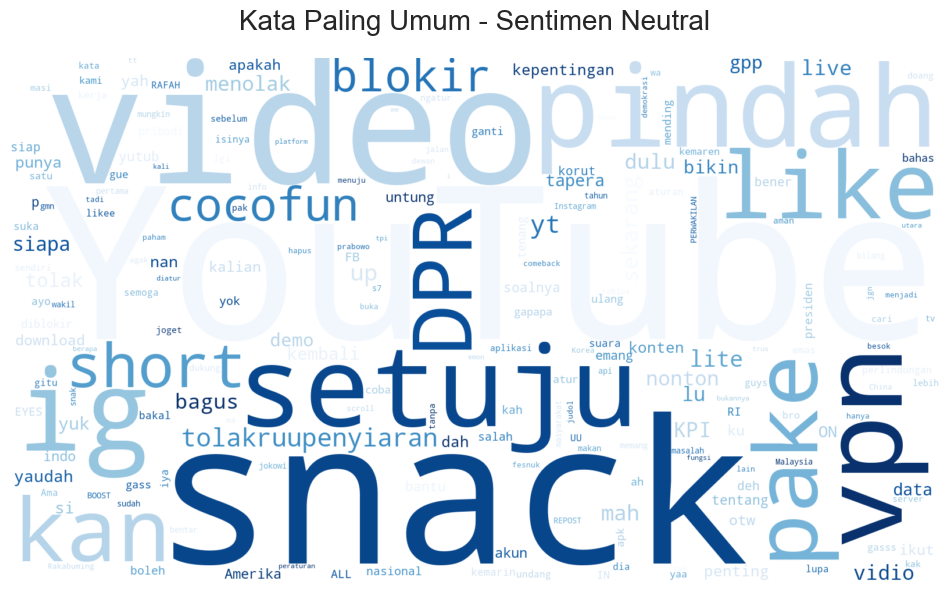


Processing WordCloud: 'Negative' ---


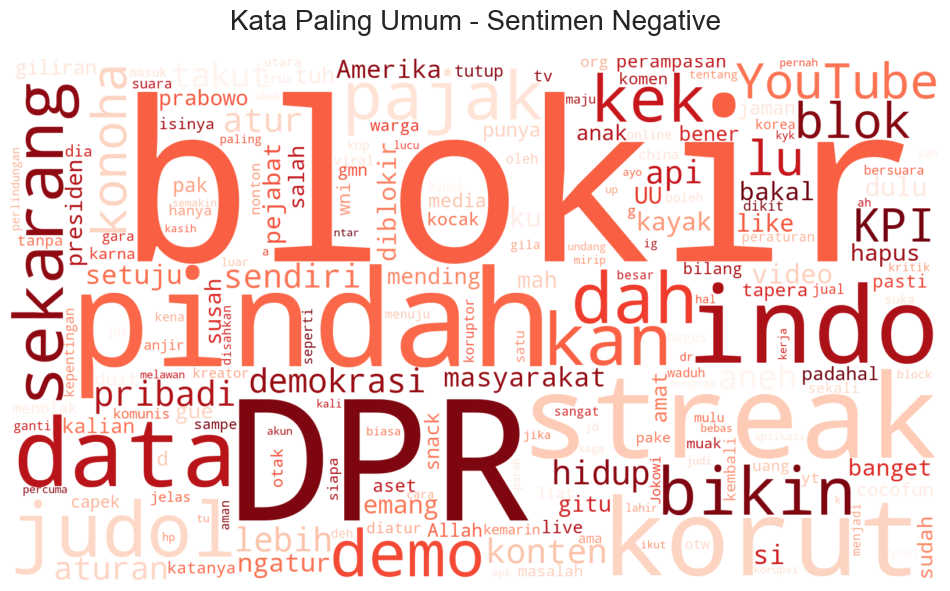


Processing WordCloud: 'Positive' ---


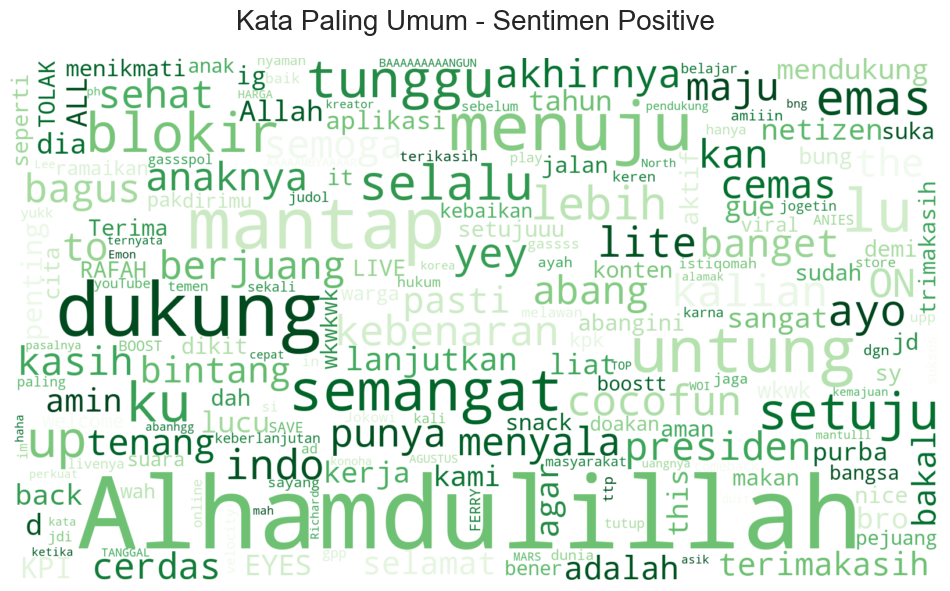

In [ ]:
# Word cloud per sentiment

stopwords_indonesia = set([
    'di', 'dan', 'ini', 'itu', 'ke', 'dari', 'dengan', 'untuk', 'pada', 'juga', 'ya', 'ga', 'bgt',
    'akan', 'tidak', 'telah', 'karena', 'yg', 'gak', 'nya', 'aja', 'saja', 'lagi', 'dalam', 'belum',
    'yang', 'ke', 'ada', 'https://t', 'co', 'jadi', 'buat', 'kalau', 'kok', 'mari', 'tapi', 'apa', 'mau',
    'jangan', 'harus', 'bukan', 'kita', 'bisa', 'sama', 'berarti', 'lingkungan', 'cuma', 'kalo', 'banyak', 
    'bang', 'gw', 'tiktok', 'aku', 'sih', 'masih', 'gua', 'tok', 'oke', 'gimana', 'biar', 'baru', 'gini', 'tik', 
    'bg', 'balik', 'mana', 'ni', 'nih', 'lama', 'gk', 'kenapa', 'malah', 'tinggal', 'atau', 'ok', 'tau', 'aj', 'para', 
    'era', 'anj', 'udh', 'pemerintah', 'negara', 'makin', 'Indonesia', 'lah', 'penyiaran', 'klo', 'udah', 'semua', 'dong', 
    'masa', 'gas', 'rakyat', 'mereka', 'jir', 'orang', 'nanti', 'terus', 'saya', 'kaya', 'RUU'
])
sentiments = df_sentiment['sentiment_label'].unique()
color_map = {
    'Positive': 'Greens',
    'Neutral': 'Blues',
    'Negative': 'Reds'
}

for sentiment in sentiments:
    print(f"\nProcessing WordCloud: '{sentiment}' ---")
    subset_text = " ".join(df_sentiment[df_sentiment['sentiment_label'] == sentiment]['cleaned_text'])
    if not subset_text.strip():
        print(f"Empty text, WordCloud for '{sentiment}' passed.")
        continue
    wordcloud = WordCloud(
        width=1600,
        height=900,
        background_color='white',
        stopwords=stopwords_indonesia,
        colormap=color_map.get(sentiment, 'viridis'), # Ambil warna dari map
        min_font_size=10,
        max_words=200,
        relative_scaling=0.5,
        collocations=False  
    ).generate(subset_text)

    plt.figure(figsize=(12, 8)) # Buat figur baru di setiap iterasi
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Kata Paling Umum - Sentimen {sentiment}', fontsize=20, pad=20)
    plt.axis("off") # Hilangkan sumbu x dan y
    plt.show()